In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from collections import defaultdict, Counter
import re

In [2]:
%matplotlib inline
sns.set_style("darkgrid")

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<AxesSubplot:xlabel='target', ylabel='count'>

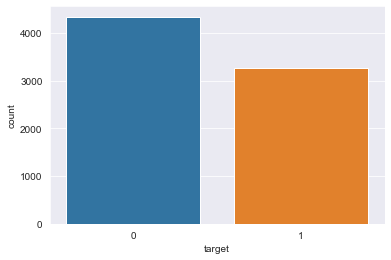

In [5]:
sns.countplot(x="target", data=df)

<AxesSubplot:>

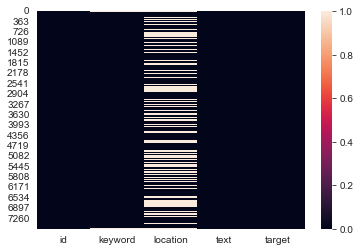

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
df[df["keyword"].notnull()]["keyword"].unique()

array(['ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'derailed

In [9]:
df["text"] = df["text"].str.lower()

In [10]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @thetawniest the out of control w...,1
7610,10871,NaN,NaN,m1.94 [01:04 utc]?5km s of volcano hawaii. htt...,1
7611,10872,NaN,NaN,police investigating after an e-bike collided ...,1


In [11]:
df["length"] = df["text"].apply(len)

In [12]:
df

,id,keyword,location,text,target,length
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1,69
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,38
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1,83
7609,10870,NaN,NaN,@aria_ahrary @thetawniest the out of control w...,1,125
7610,10871,NaN,NaN,m1.94 [01:04 utc]?5km s of volcano hawaii. htt...,1,65
7611,10872,NaN,NaN,police investigating after an e-bike collided ...,1,137


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

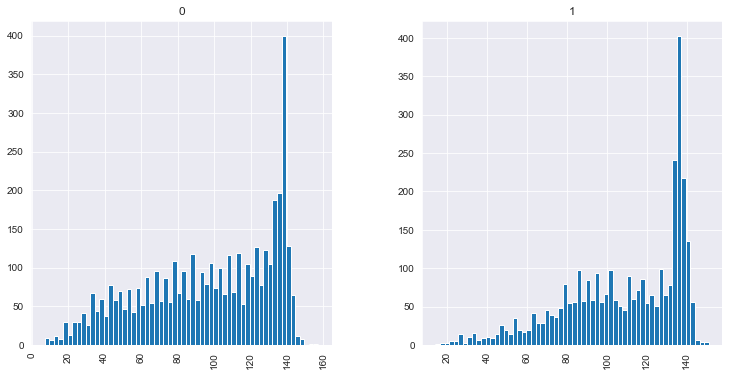

In [13]:
df.hist(column="length", by="target", bins=60, figsize=(12,6))

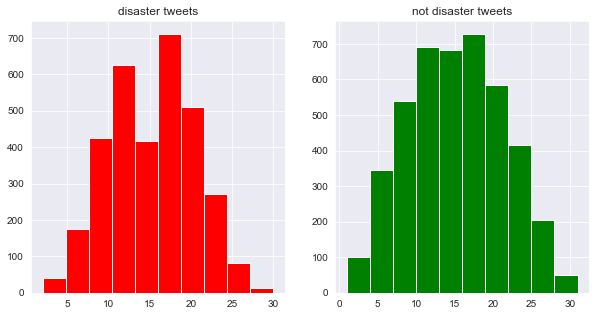

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
tweet_len = df[df["target"] == 1]["text"].apply(lambda line: len(line.split()))

ax1.hist(tweet_len, color="red")
ax1.set_title("disaster tweets")

tweet_len = df[df["target"] == 0]["text"].apply(lambda line: len(line.split()))
ax2.hist(tweet_len, color="green")
ax2.set_title("not disaster tweets")
plt.show()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each tweet')

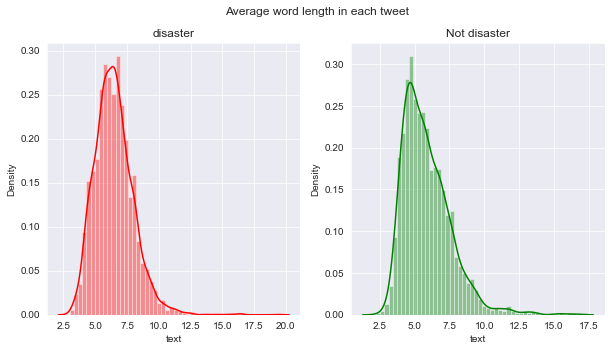

In [15]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df[df['target']==1]['text'].apply(lambda line : [len(x) for x in line.split()])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('disaster')
word=df[df['target']==0]['text'].apply(lambda line : [len(x) for x in line.split()])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')

In [16]:
tweet_len

15       3
16       3
17       3
18       5
19       3
        ..
7581    13
7582    11
7584    13
7587     2
7593    12
Name: text, Length: 4342, dtype: int64

In [17]:
stop = stopwords.words('english')

In [18]:
def create_corpus(target):
    corpus=[]
    
    for x in df[df['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [19]:
corpus = create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1
    
top = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:10]

<BarContainer object of 10 artists>

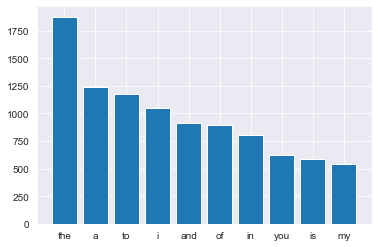

In [20]:
x,y = zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

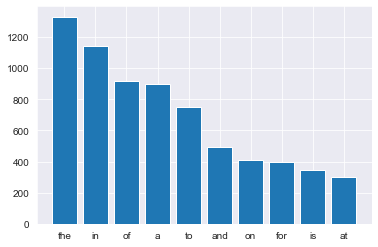

In [21]:
corpus = create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1
    
top = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:10]

x,y = zip(*top)
plt.bar(x,y)

<BarContainer object of 20 artists>

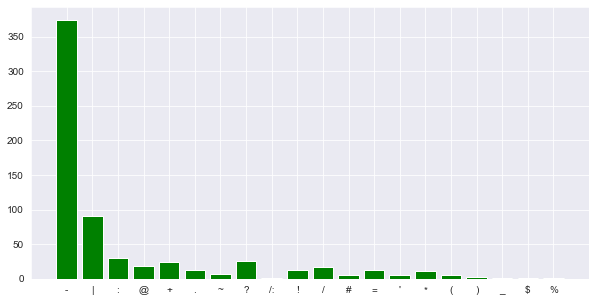

In [22]:
plt.figure(figsize=(10,5))
corpus=create_corpus(0)

dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='green')

<BarContainer object of 18 artists>

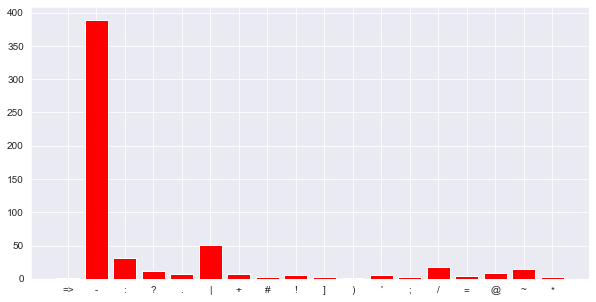

In [23]:
plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='red')

In [24]:
corpus = create_corpus(0)
counter=Counter(corpus)
most=counter.most_common()

x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

In [25]:
x

['-', 'like', "i'm", '&amp;', '??', 'new']

In [26]:
y

[374, 250, 195, 190, 183, 163]

<AxesSubplot:>

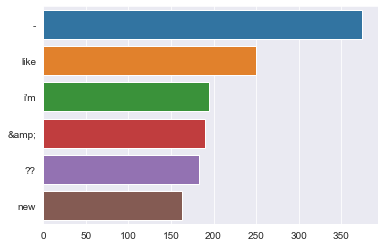

In [27]:
sns.barplot(x=y,y=x)

In [28]:
corpus = create_corpus(1)
counter=Counter(corpus)
most=counter.most_common()

x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

<AxesSubplot:>

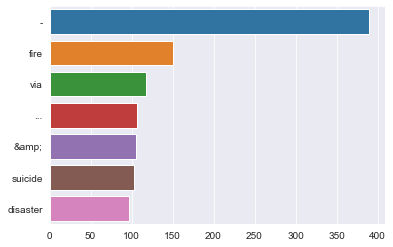

In [29]:
sns.barplot(x=y,y=x)

In [30]:
df.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1,69
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,38
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1,88


In [31]:
df['text'] = df["text"].str.lower()

In [32]:
df.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1,69
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,38
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1,88


In [33]:
url = re.compile(r'https?://\S+|www\.\S+')
df['text'] = df['text'].apply(lambda x : url.sub(r'', x))

In [34]:
df

,id,keyword,location,text,target,length
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1,69
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,38
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1,83
7609,10870,NaN,NaN,@aria_ahrary @thetawniest the out of control w...,1,125
7610,10871,NaN,NaN,m1.94 [01:04 utc]?5km s of volcano hawaii.,1,65
7611,10872,NaN,NaN,police investigating after an e-bike collided ...,1,137


In [35]:
html = re.compile(r'<.*?>')
df['text'] = df['text'].apply(lambda x: html.sub(r'', x))

In [36]:
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
df['text'] = df['text'].apply(lambda x: html.sub(r'', x))

In [37]:
table = str.maketrans('', '', string.punctuation)

In [38]:
table

{33: None,
 34: None,
 35: None,
 36: None,
 37: None,
 38: None,
 39: None,
 40: None,
 41: None,
 42: None,
 43: None,
 44: None,
 45: None,
 46: None,
 47: None,
 58: None,
 59: None,
 60: None,
 61: None,
 62: None,
 63: None,
 64: None,
 91: None,
 92: None,
 93: None,
 94: None,
 95: None,
 96: None,
 123: None,
 124: None,
 125: None,
 126: None}

In [39]:
df['text'] = df['text'].apply(lambda x: x.translate(table))

In [40]:
df

,id,keyword,location,text,target,length
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,69
1,4,NaN,NaN,forest fire near la ronge sask canada,1,38
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,133
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1,65
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1,83
7609,10870,NaN,NaN,ariaahrary thetawniest the out of control wild...,1,125
7610,10871,NaN,NaN,m194 0104 utc5km s of volcano hawaii,1,65
7611,10872,NaN,NaN,police investigating after an ebike collided w...,1,137


In [41]:
X = df["text"]

In [42]:
y = df["target"]

In [43]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [46]:
print(y_train)
print(y_test)

2707    0
6479    0
4499    1
7181    0
4250    1
       ..
599     1
5695    1
1361    1
1547    0
4959    0
Name: target, Length: 5329, dtype: int64
5475    0
6387    1
4343    0
4524    1
2771    1
       ..
4809    0
4638    0
5605    1
5910    0
4667    0
Name: target, Length: 2284, dtype: int64


In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [48]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
words_to_index = tokenizer.word_index

In [49]:
vocab_size = len(words_to_index) + 1
print(vocab_size)

14430


In [50]:
embedding_dict = {}
with open('./glove.6B.100d.txt', 'r', encoding='UTF-8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], 'float32')
        embedding_dict[word] = vector
file.close()

In [51]:
vector_size = 100 #As we are using 100D GloVe word embedding

In [52]:
embedding_matrix = np.zeros((vocab_size, vector_size))

In [53]:
for word, index in words_to_index.items():
    vector = embedding_dict.get(word)
    if vector is not None:
        embedding_matrix[index, : ] = vector

In [54]:
Max_Len = 50

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Activation, Dropout, Dense, Input, Embedding

In [56]:
embedding = Embedding(input_dim=vocab_size, output_dim=100, 
                      input_length = Max_Len, weights = [embedding_matrix], trainable=False)

In [74]:
model=Sequential()

model.add(embedding)
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [75]:
X_train

2707    detonation fashionable mountaineering electron...
6479    benaffleck  i respected you and liked you for ...
4499    lavapixcom did you see hurricane guillermo wit...
7181    fur leather coats sprite amp weapon of choice ...
4250    heat advisory is in effect from 1 pm through 7...
                              ...                        
599     usatoday on todays frontpage bioterror lab fac...
5695    young children among those rescued from capsiz...
1361    kshllcenterpri1 progress4ohio burning down bui...
1547    nueva favorita emergency feat the chemical bro...
4959    dmoneydemi i had my meltdown yesterday  im goi...
Name: text, Length: 5329, dtype: object

In [76]:
X_train_indices = tokenizer.texts_to_sequences(X_train)
X_test_indices = tokenizer.texts_to_sequences(X_test)

In [77]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train_indices = pad_sequences(X_train_indices, maxlen=Max_Len, padding='post')
X_test_indices = pad_sequences(X_test_indices, maxlen=Max_Len, padding='post')

In [78]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [79]:
model.fit(
    x = X_train_indices,y = y_train, epochs=300, 
    validation_data=(X_test_indices, y_test),
    callbacks = [early_stop]
)

Epoch 1/300
167/167 [==============================] - 3s 19ms/step - loss: 0.6008 - val_loss: 0.5289
Epoch 2/300
167/167 [==============================] - 3s 17ms/step - loss: 0.5123 - val_loss: 0.4535
Epoch 3/300
167/167 [==============================] - 3s 17ms/step - loss: 0.4961 - val_loss: 0.4692
Epoch 4/300
167/167 [==============================] - 3s 18ms/step - loss: 0.4917 - val_loss: 0.4401
Epoch 5/300
167/167 [==============================] - 3s 19ms/step - loss: 0.4696 - val_loss: 0.4391
Epoch 6/300
167/167 [==============================] - 3s 17ms/step - loss: 0.4681 - val_loss: 0.4314
Epoch 7/300
167/167 [==============================] - 3s 16ms/step - loss: 0.4630 - val_loss: 0.4356
Epoch 8/300
167/167 [==============================] - 3s 16ms/step - loss: 0.4545 - val_loss: 0.4576
Epoch 9/300
167/167 [==============================] - 3s 16ms/step - loss: 0.4495 - val_loss: 0.4252
Epoch 10/300
167/167 [==============================] - 3s 17ms/step - loss: 0.452

In [80]:
model.history.history

{'loss': [0.600768506526947,
  0.5122851133346558,
  0.49612265825271606,
  0.49173009395599365,
  0.4696285128593445,
  0.46813517808914185,
  0.463005930185318,
  0.4544878304004669,
  0.44951969385147095,
  0.4521900415420532,
  0.4394858777523041,
  0.4489445984363556,
  0.43320363759994507,
  0.4320164918899536,
  0.4367259442806244,
  0.4185482859611511,
  0.41258275508880615,
  0.41296350955963135,
  0.4102308452129364,
  0.4015749394893646,
  0.39378058910369873,
  0.39583221077919006,
  0.39180177450180054],
 'val_loss': [0.5288696885108948,
  0.4534817039966583,
  0.46917563676834106,
  0.44008946418762207,
  0.4390525817871094,
  0.4313901662826538,
  0.4356483817100525,
  0.4575812518596649,
  0.4252254068851471,
  0.4301830530166626,
  0.44033244252204895,
  0.4260893166065216,
  0.4194111227989197,
  0.4290817975997925,
  0.4264066815376282,
  0.4235920310020447,
  0.4370490312576294,
  0.4472213387489319,
  0.4250330924987793,
  0.43438810110092163,
  0.4533814787864685,

In [81]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

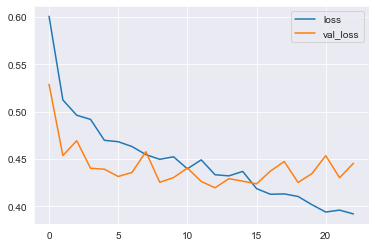

In [82]:
losses.plot()

In [83]:
predictions = model.predict_classes(X_test_indices)

In [84]:
from sklearn.metrics import classification_report, confusion_matrix

In [85]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85      1330
           1       0.84      0.70      0.76       954

    accuracy                           0.82      2284
   macro avg       0.82      0.80      0.81      2284
weighted avg       0.82      0.82      0.82      2284



In [86]:
print(confusion_matrix(y_test, predictions))

[[1205  125]
 [ 287  667]]


In [93]:
test_df = pd.read_csv('test.csv')

In [94]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [100]:
test_df['text'] = test_df['text'].str.lower()

In [101]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,just happened a terrible car crash
1,2,NaN,NaN,"heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,apocalypse lighting. #spokane #wildfires
4,11,NaN,NaN,typhoon soudelor kills 28 in china and taiwan
...,...,...,...,...
3258,10861,NaN,NaN,earthquake safety los angeles ûò safety faste...
3259,10865,NaN,NaN,storm in ri worse than last hurricane. my city...
3260,10868,NaN,NaN,green line derailment in chicago http://t.co/u...
3261,10874,NaN,NaN,meg issues hazardous weather outlook (hwo) htt...


In [102]:
url = re.compile(r'https?://\S+|www\.\S+')
test_df['text'] = test_df['text'].apply(lambda x : url.sub(r'', x))

In [103]:
html = re.compile(r'<.*?>')
test_df['text'] = test_df['text'].apply(lambda x: html.sub(r'', x))

In [104]:
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
test_df['text'] = test_df['text'].apply(lambda x: html.sub(r'', x))

In [106]:
table = str.maketrans('', '', string.punctuation)
test_df['text'] = test_df['text'].apply(lambda x: x.translate(table))

In [107]:
text = tokenizer.texts_to_sequences(test_df['text'])

In [108]:
text

[[29, 876, 2, 2445, 130, 80],
 [493, 50, 210, 8, 961, 3184, 538, 1645, 178],
 [74,
  8,
  2,
  191,
  44,
  16,
  655,
  2506,
  21,
  4726,
  724,
  1,
  697,
  7,
  1297,
  424,
  110,
  38],
 [468, 3481, 9988, 1247],
 [598, 743, 607, 12485, 3, 700, 6, 1120],
 [66, 43, 210],
 [2917, 870, 89, 440, 51, 127, 79, 3292, 139, 2244, 5274, 5274],
 [695, 62, 21, 11],
 [55, 2, 1737, 987],
 [384, 90],
 [42, 7, 61, 24, 1032],
 [61, 70, 14],
 [42, 61, 663, 25, 14],
 [55, 46],
 [1004],
 [3662, 2561, 375, 8, 567, 841, 65, 44, 4643, 35, 16, 10175, 2561, 375],
 [40, 11, 14380, 9, 2202, 567],
 [8014, 996, 5030, 945, 532, 567],
 [483, 270, 35, 5261],
 [5092, 2232, 12, 1090, 1090, 567],
 [11410, 111, 567, 34],
 [87, 103, 567, 17, 53],
 [31,
  2,
  3364,
  427,
  56,
  40,
  141,
  204,
  403,
  6,
  314,
  15,
  13,
  2074,
  37,
  43,
  1177,
  666,
  54,
  8,
  50,
  71,
  229,
  1,
  316,
  567,
  6838],
 [3099,
  1332,
  1007,
  26,
  182,
  5030,
  11491,
  567,
  2,
  276,
  612,
  5,
  1168,
  30

In [109]:
text = pad_sequences(text, maxlen=Max_Len, padding='post')

In [110]:
text

array([[   29,   876,     2, ...,     0,     0,     0],
       [  493,    50,   210, ...,     0,     0,     0],
       [   74,     8,     2, ...,     0,     0,     0],
       ...,
       [ 1080,   723,   253, ...,     0,     0,     0],
       [11136,   596,   867, ...,     0,     0,     0],
       [ 4606,    39,  3166, ...,     0,     0,     0]])

In [113]:
prediction = model.predict_classes(text)

In [135]:
prediction = np.array(prediction)

In [141]:
prediction = np.reshape(prediction, (len(prediciton)))

In [142]:
prediction

array([1, 1, 1, ..., 1, 1, 0])

In [144]:
submission = pd.DataFrame({'id': test_df["id"], 'target': prediction})

In [146]:
submission.reset_index

<bound method DataFrame.reset_index of          id  target
0         0       1
1         2       1
2         3       1
3         9       1
4        11       1
...     ...     ...
3258  10861       1
3259  10865       1
3260  10868       1
3261  10874       1
3262  10875       0

[3263 rows x 2 columns]>

In [148]:
submission.set_index('id')

,target
id,
0,1
2,1
3,1
9,1
11,1
...,...
10861,1
10865,1
10868,1


In [150]:
submission.to_csv('submission.csv', index=False)